# CIFAR-10 Dataset

## 1. Setup

In [14]:
import numpy as np
from numpy import mean
from numpy import std
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import tensorflow as tf
import tensorflow as tf
import keras.layers as l
import keras.models as m
import keras.optimizers as o
import matplotlib
from matplotlib import pyplot
from tqdm import tqdm

### 1.1. Loading Data & Normalization

This is an example image from the CIFAR-10 dataset:


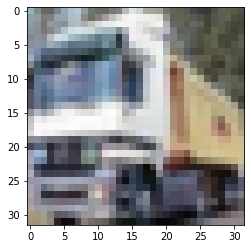

In [2]:
# Load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()
print("This is an example image from the CIFAR-10 dataset:")
pyplot.imshow(trainX[1])

# Split to train/test
# One hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# Convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')

# Normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

## 2. CNN Model Construction

In [ ]:
import keras.layers as l
import keras.models as m
import keras.optimizers as o

inp = l.Input(shape = (32, 32, 3))
hid = l.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', kernel_initializer = 'he_uniform', input_shape=(32, 32, 3))(inp)
hid = l.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', kernel_initializer = 'he_uniform')(inp)
hid = l.MaxPooling2D((2,2))(hid)
hid = l.Dropout(0.2)(hid)
hid = l.Conv2D(64, (3,3), activation = "relu", padding = 'same', kernel_initializer = 'he_uniform')(hid)
hid = l.Conv2D(64, (3,3), activation = "relu", padding = 'same', kernel_initializer = 'he_uniform')(hid)
hid = l.MaxPooling2D((2,2))(hid)
hid = l.Dropout(0.2)(hid)
hid = l.Conv2D(128, (3,3), activation = "relu", padding = 'same', kernel_initializer = 'he_uniform')(hid)
hid = l.Conv2D(128, (3,3), activation = "relu", padding = 'same', kernel_initializer = 'he_uniform')(hid)
hid = l.MaxPooling2D((2,2))(hid)
hid = l.Dropout(0.2)(hid)
hid = l.Flatten()(hid)
hid = l.Dense(128, activation = 'relu', kernel_initializer = 'he_uniform')(hid)
hid = l.Dropout(0.2)(hid)
out = l.Dense(10, activation = 'softmax')(hid)

cifar_classifier = m.Model(inp, out)
cifar_classifier.summary()
cifar_classifier.compile(
    loss='categorical_crossentropy',
    optimizer=o.Adam(),
    metrics=["accuracy"]
)

### 2.1. Model Training

In [ ]:
cifar_classifier.fit(
    trainX,
    trainY,
    batch_size=64,
    epochs=30,
    validation_data=(testX, testY)
)

In [ ]:
test_loss, test_accuracy = cifar_classifier.evaluate(testX, testY, verbose=0)
print('> %.3f' % (test_accuracy * 100.0))

### 2.2 Loading Model from File

In [3]:
cifar_classifier = keras.models.load_model('CNN_model_cifar.h5')
cifar_classifier.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0     

### 2.3. Auxiliary Functions

In [ ]:
def predict(x, model):
    
    classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
    
    # Input: single image from the dataset
    # Output: Output & prediction of the NN
    # Arguments: 1. input image (32x32), 2. model
    
    activations = model.predict(x.reshape(1,32, 32, 3))
    prediction = np.argmax(activations)
    
    # Print the prediction of the network
    print('Network output: ')
    print(activations)
    print('Network prediction: ')
    print(str(prediction) + ": " + classes[prediction])
    
    ## barplot of prediction probabilities
    pyplot.figure(figsize=(5,5))
    pyplot.bar(range(10), activations[0])
    pyplot.show()
      
    print('Actual image: ')
    ## input image
    pyplot.figure(figsize=(5,5))
    pyplot.imshow(x)
    pyplot.axis('off')
    pyplot.show()
    
    
    
def predict_adv(x, x_adv, model):
    
    classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
    
    # Input: single image from the dataset
    # Output: Output & prediction of the NN
    # Arguments: 1. input image (32x32), 2. adversarial example (32x32), 3. model
    
    activations = model.predict(x.reshape(1, 32, 32, 3))
    prediction = np.argmax(activations)
    
    activations2 = model.predict(x_adv.reshape(1, 32, 32, 3))
    prediction2 = np.argmax(activations2)
    
    
    # barplots
    pyplot.figure(figsize=(10,10))
    
    ## actual
    print('Sample Image: Network output = ' + str(activations) + '\n')
    pyplot.subplot(2, 2, 1)
    pyplot.bar(range(10), activations[0])
    
    ## adversarial
    print('Adversarial Example: Network output = ' + str(activations2) + '\n')
    pyplot.subplot(2, 2, 2)
    pyplot.bar(range(10), activations2[0])
    
    
    
    # images
    print('Actual and Adversarial example images:\n')
    
    print('Sample Image - Network prediction = ' + str(prediction) + ": " + classes[prediction])
    pyplot.subplot(2, 2, 3)
    pyplot.imshow(x.reshape(32, 32, 3))
    pyplot.axis('off')
    
    print('Adversarial Example - Network prediction = ' + str(prediction2) + ": " + classes[prediction2])
    pyplot.subplot(2, 2, 4)
    pyplot.imshow(x_adv.reshape(32, 32, 3))
    pyplot.axis('off')
    
    pyplot.show()

Here is an example of how the auxiliary function `predict` works:

Network output: 
[[7.1096957e-07 8.8154656e-10 1.7207376e-06 2.3704126e-07 5.9231254e-03
  2.7004245e-04 2.5539054e-10 9.9380422e-01 1.4996662e-10 4.1507580e-08]]
Network prediction: 
7: Horse


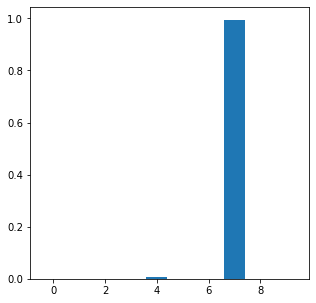

Actual image: 


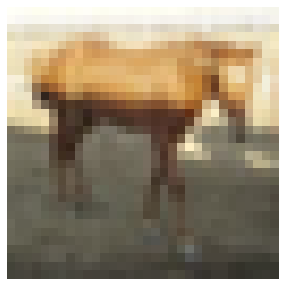

In [26]:
predict(trainX[2000], cifar_classifier)

## 3. Adversarial Examples

For our adversarial example, we will try to create adversarial images for a random image from class "Cat", for all other classes; that is, we will try to trick our CNN into mis-classifying an image of class "Cat" as "Truck", "Airplane", etc.

Here is the image we will be working with:

Network output: 
[[6.5897680e-06 1.4146072e-07 4.5221806e-02 7.6818770e-01 4.8139305e-03
  1.6659123e-01 7.9287346e-03 7.2471285e-03 3.6481302e-07 2.3835328e-06]]
Network prediction: 
3: Cat


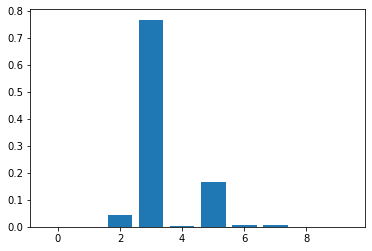

Actual image: 


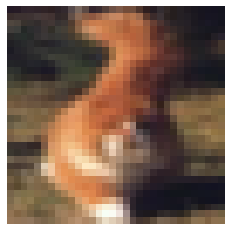

In [13]:
# Re-loading dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()

indexes = np.random.randint(0, trainX.shape[0], size=50)
labind = []
lab = np.where(trainY[indexes] == 3)
labind.append(indexes[lab[0][0]])


# One hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# Convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')

# Normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

image = trainX[labind]
# pyplot.imshow(image.reshape(32, 32, 3))
# cifar_classifier.predict(image)
predict(image.reshape(32, 32, 3), cifar_classifier)

### 3.1. The Adversarial Model

There are 2 models utilized in order to create the adversarial examples:

1. `adverseModel`: Has a single input neuron -always set to 1- and outputs a 32x32 RGB image. This model is trained to output an image similar to the sample image (e.g. the image of the cat).
2. `compositeModel`: The **Composite model** is practically the CNN we built above which now takes as input the fixed 1 value; that is, the composite model is the combination of our adverse model and the classifier we built above, $C ◦ f$ with `C` being our classifier and `f` the adverse model. It is important in this case to disable training for our CNN model with `cifar_classifier.trainable = False`, since we don't want our classifier to get trained on the erroneous adversarial examples.

In practice, we generate an image that is similar to the sample image (e.g. the cat image), and then train our composite model to classify it as an aberrantly chosen class (e.g. as "deer")

In [16]:
cifar_classifier.trainable = False

inp = l.Input(shape=(1,))
hid = l.Dense(512, activation="relu")(inp)
hid = l.Dense(32*32*3, activation="sigmoid")(hid)
out = l.Reshape((32, 32, 3))(hid)

adverseModel = m.Model(inp, out)
adverseModel.compile(
    loss='mean_squared_error',
    optimizer=o.Adam(lr=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
    
compositeModel = m.Model(inp, cifar_classifier(out))
compositeModel.compile(
    loss='categorical_crossentropy',
    optimizer=o.Adam(lr=0.001),
    metrics=["accuracy"]
)

adverseModel.summary()
compositeModel.summary()

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               1024      
_________________________________________________________________
dense_21 (Dense)             (None, 3072)              1575936   
_________________________________________________________________
reshape_10 (Reshape)         (None, 32, 32, 3)         0         
Total params: 1,576,960
Trainable params: 1,576,960
Non-trainable params: 0
_________________________________________________________________
Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 1)]               0         
______________________________

### 3.2. Create Adversarial Examples

100%|██████████| 1000/1000 [00:28<00:00, 35.00it/s]


Sample Image: Network output = [[6.5897680e-06 1.4146072e-07 4.5221806e-02 7.6818770e-01 4.8139305e-03
  1.6659123e-01 7.9287346e-03 7.2471285e-03 3.6481302e-07 2.3835328e-06]]
Adversarial Example: Network output = [[8.1032223e-01 2.5245131e-04 2.9927447e-02 1.3306390e-02 9.8970152e-02
  1.2427766e-02 3.0581458e-03 2.3813287e-02 1.2436646e-04 7.7977735e-03]]
Actual and Adversarial example images:

Sample Image - Network prediction = 3: Cat
Adversarial Example - Network prediction = 0: Airplane


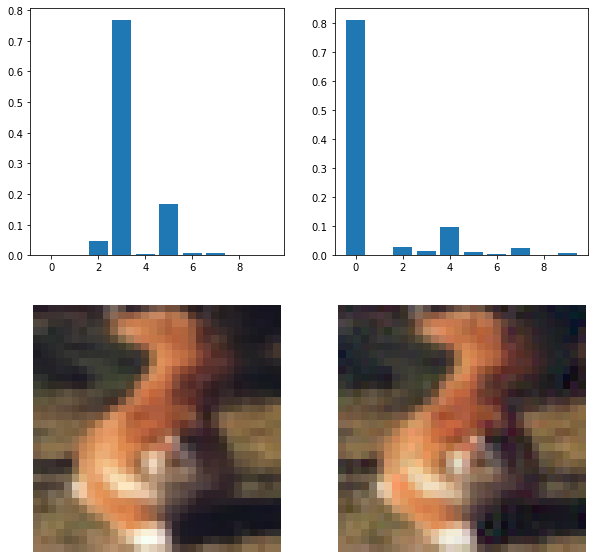

100%|██████████| 1000/1000 [00:32<00:00, 30.82it/s]

Sample Image: Network output = [[6.5897680e-06 1.4146072e-07 4.5221806e-02 7.6818770e-01 4.8139305e-03
  1.6659123e-01 7.9287346e-03 7.2471285e-03 3.6481302e-07 2.3835328e-06]]
Adversarial Example: Network output = [[4.3762913e-05 9.6933055e-01 1.0653015e-03 1.5287203e-04 1.5457414e-05
  2.4308278e-05 1.6104367e-04 5.3952363e-06 6.3979445e-05 2.9137330e-02]]
Actual and Adversarial example images:

Sample Image - Network prediction = 3: Cat
Adversarial Example - Network prediction = 1: Automobile


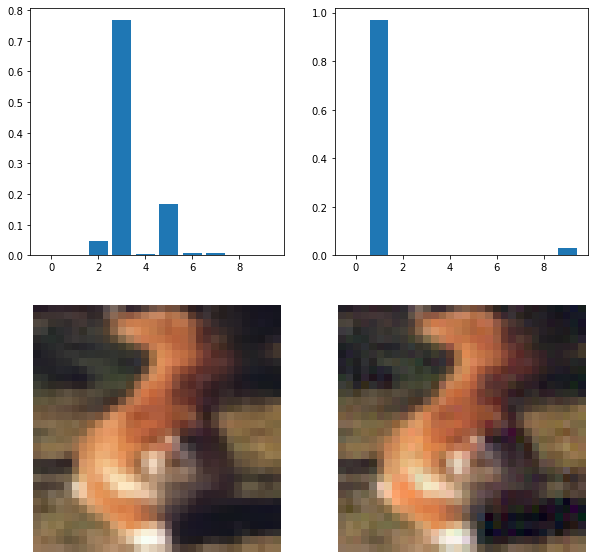

100%|██████████| 1000/1000 [00:30<00:00, 33.32it/s]


Sample Image: Network output = [[6.5897680e-06 1.4146072e-07 4.5221806e-02 7.6818770e-01 4.8139305e-03
  1.6659123e-01 7.9287346e-03 7.2471285e-03 3.6481302e-07 2.3835328e-06]]
Adversarial Example: Network output = [[4.10015872e-07 9.74670233e-10 9.99174893e-01 3.87082546e-05
  1.14030365e-04 1.82977499e-04 4.74098604e-04 1.48547215e-05
  1.97930172e-10 1.49364645e-08]]
Actual and Adversarial example images:

Sample Image - Network prediction = 3: Cat
Adversarial Example - Network prediction = 2: Bird


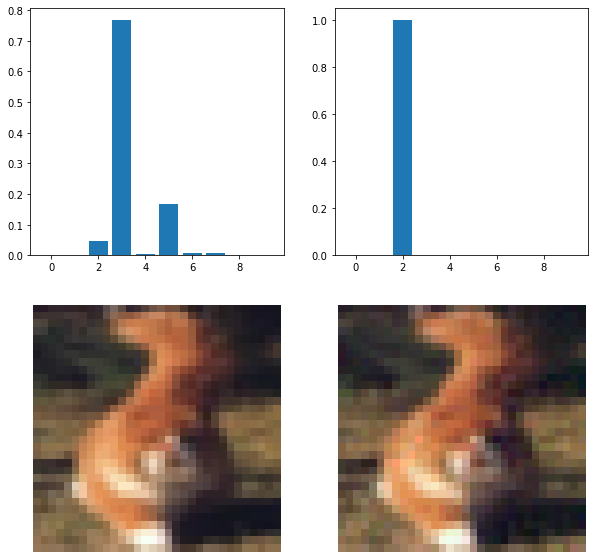

100%|██████████| 1000/1000 [00:29<00:00, 33.91it/s]


Sample Image: Network output = [[6.5897680e-06 1.4146072e-07 4.5221806e-02 7.6818770e-01 4.8139305e-03
  1.6659123e-01 7.9287346e-03 7.2471285e-03 3.6481302e-07 2.3835328e-06]]
Adversarial Example: Network output = [[3.03196268e-09 7.25808080e-10 6.31013594e-04 9.84935939e-01
  1.39610434e-04 1.35938125e-02 6.49715541e-04 4.98547452e-05
  4.25969843e-10 5.04766762e-09]]
Actual and Adversarial example images:

Sample Image - Network prediction = 3: Cat
Adversarial Example - Network prediction = 3: Cat


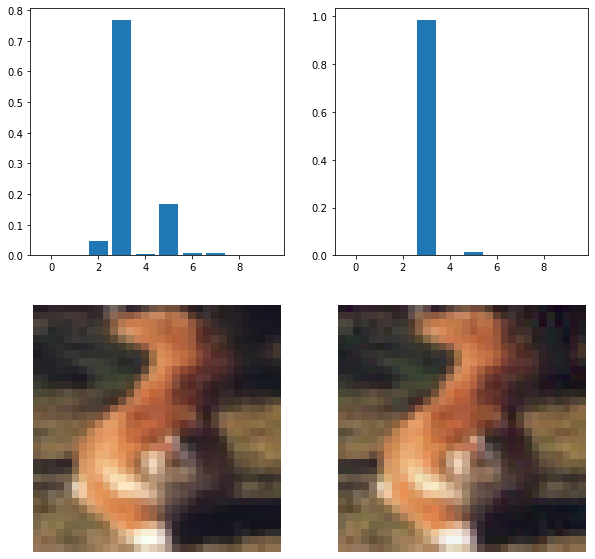

100%|██████████| 1000/1000 [00:30<00:00, 32.59it/s]


Sample Image: Network output = [[6.5897680e-06 1.4146072e-07 4.5221806e-02 7.6818770e-01 4.8139305e-03
  1.6659123e-01 7.9287346e-03 7.2471285e-03 3.6481302e-07 2.3835328e-06]]
Adversarial Example: Network output = [[3.2060168e-08 3.1513728e-12 5.8531895e-04 2.1070818e-04 9.9864477e-01
  3.1556352e-04 3.2414104e-05 2.1126110e-04 5.0650387e-12 2.2429358e-10]]
Actual and Adversarial example images:

Sample Image - Network prediction = 3: Cat
Adversarial Example - Network prediction = 4: Deer


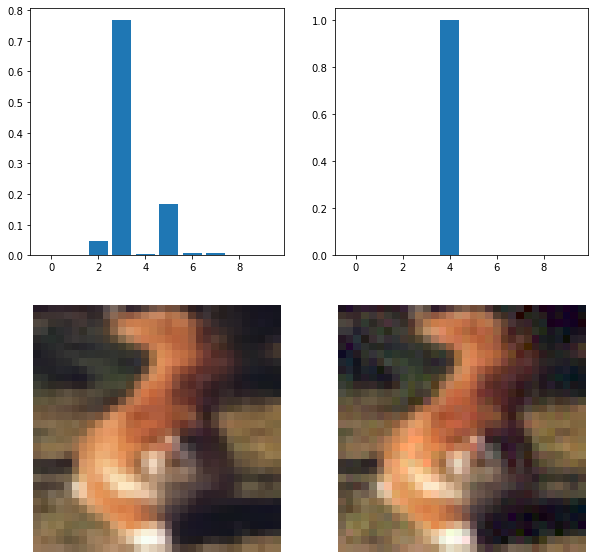

100%|██████████| 1000/1000 [00:31<00:00, 32.03it/s]

Sample Image: Network output = [[6.5897680e-06 1.4146072e-07 4.5221806e-02 7.6818770e-01 4.8139305e-03
  1.6659123e-01 7.9287346e-03 7.2471285e-03 3.6481302e-07 2.3835328e-06]]
Adversarial Example: Network output = [[3.5663433e-10 8.6733626e-10 5.9509766e-04 8.6393027e-04 6.8078139e-06
  9.9850625e-01 2.2163931e-05 5.4287862e-06 3.5770782e-11 2.2106678e-07]]
Actual and Adversarial example images:

Sample Image - Network prediction = 3: Cat
Adversarial Example - Network prediction = 5: Dog


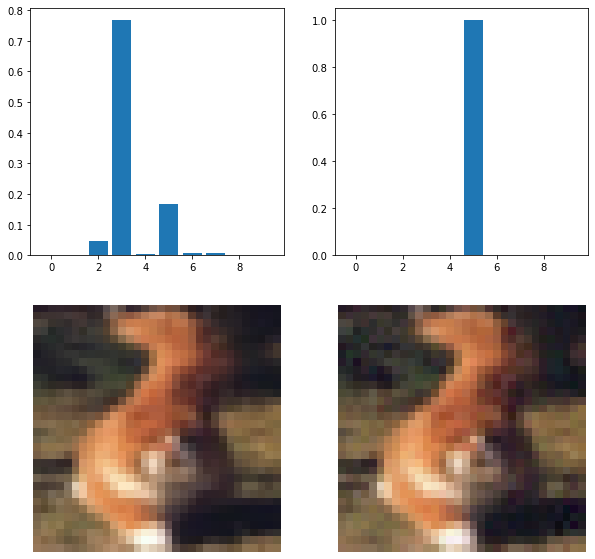

100%|██████████| 1000/1000 [00:29<00:00, 33.81it/s]

Sample Image: Network output = [[6.5897680e-06 1.4146072e-07 4.5221806e-02 7.6818770e-01 4.8139305e-03
  1.6659123e-01 7.9287346e-03 7.2471285e-03 3.6481302e-07 2.3835328e-06]]
Adversarial Example: Network output = [[2.3603915e-08 1.2873868e-07 1.2894580e-03 7.0071692e-04 9.5077303e-05
  4.6827240e-04 9.9743807e-01 7.9712081e-06 5.0371849e-09 9.5964431e-08]]
Actual and Adversarial example images:

Sample Image - Network prediction = 3: Cat
Adversarial Example - Network prediction = 6: Frog


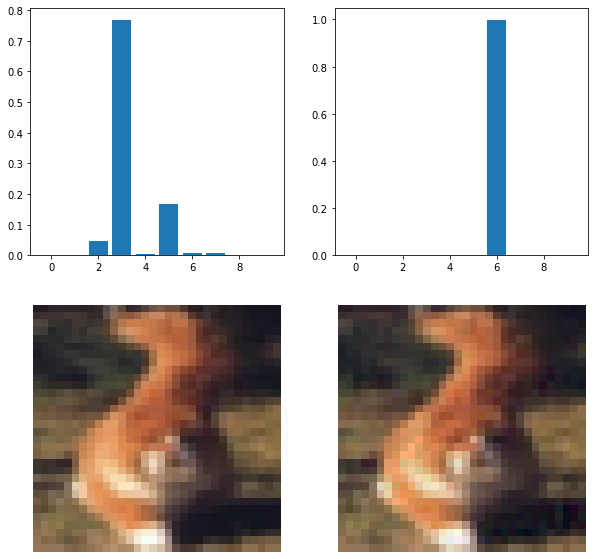

100%|██████████| 1000/1000 [00:29<00:00, 34.43it/s]


Sample Image: Network output = [[6.5897680e-06 1.4146072e-07 4.5221806e-02 7.6818770e-01 4.8139305e-03
  1.6659123e-01 7.9287346e-03 7.2471285e-03 3.6481302e-07 2.3835328e-06]]
Adversarial Example: Network output = [[1.4316900e-06 1.6028707e-08 4.3269224e-04 2.9363041e-04 2.3601630e-03
  1.0817001e-03 8.9081295e-06 9.9575233e-01 1.5167478e-09 6.9063324e-05]]
Actual and Adversarial example images:

Sample Image - Network prediction = 3: Cat
Adversarial Example - Network prediction = 7: Horse


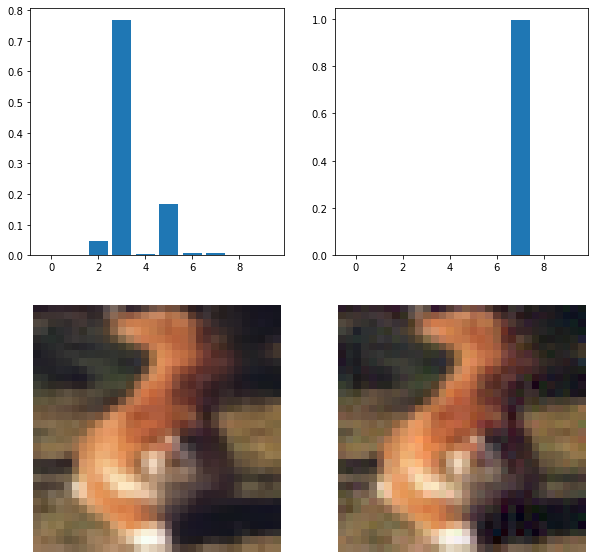

100%|██████████| 1000/1000 [00:32<00:00, 30.54it/s]


Sample Image: Network output = [[6.5897680e-06 1.4146072e-07 4.5221806e-02 7.6818770e-01 4.8139305e-03
  1.6659123e-01 7.9287346e-03 7.2471285e-03 3.6481302e-07 2.3835328e-06]]
Adversarial Example: Network output = [[2.36840434e-02 1.47459563e-03 7.06567708e-03 2.53762398e-02
  4.18629078e-03 2.48712432e-02 3.02250590e-02 1.50591545e-02
  8.67528915e-01 5.28728880e-04]]
Actual and Adversarial example images:

Sample Image - Network prediction = 3: Cat
Adversarial Example - Network prediction = 8: Ship


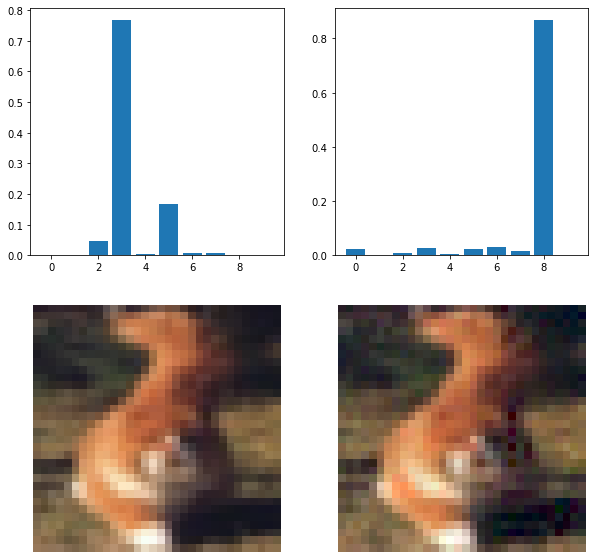

100%|██████████| 1000/1000 [00:29<00:00, 34.06it/s]

Sample Image: Network output = [[6.5897680e-06 1.4146072e-07 4.5221806e-02 7.6818770e-01 4.8139305e-03
  1.6659123e-01 7.9287346e-03 7.2471285e-03 3.6481302e-07 2.3835328e-06]]
Adversarial Example: Network output = [[4.1737462e-06 9.5469790e-04 1.1771599e-05 2.6838708e-04 1.2851317e-06
  9.0122106e-05 4.4457020e-06 8.5196123e-05 5.8768251e-07 9.9857938e-01]]
Actual and Adversarial example images:

Sample Image - Network prediction = 3: Cat
Adversarial Example - Network prediction = 9: Truck


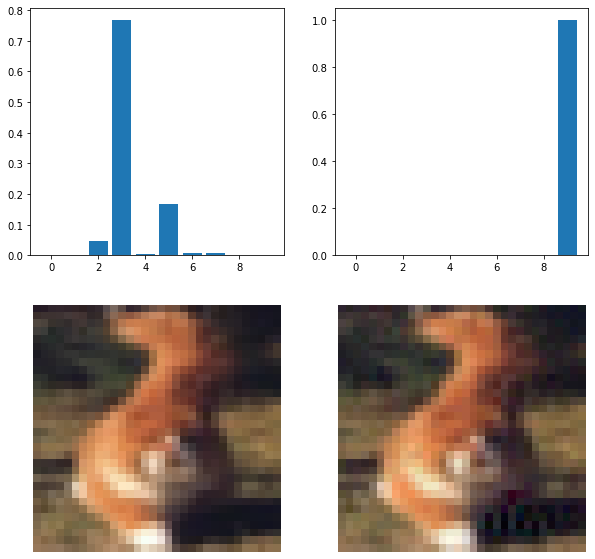

In [32]:
for j in range(10):
        
    # getting the model
    cifar_classifier.trainable = False

    inp = l.Input(shape=(1,))
    hid = l.Dense(512, activation="relu")(inp)
    hid = l.Dense(32*32*3, activation="sigmoid")(hid)
    out = l.Reshape((32, 32, 3))(hid)

    advModel = m.Model(inp, out)
    advModel.compile(
        loss='mean_squared_error',
        optimizer=o.Adam(lr=0.001),
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    
    compModel = m.Model(inp, cifar_classifier(out))
    compModel.compile(
        loss='categorical_crossentropy',
          optimizer=o.Adam(lr=0.001),
          metrics=["accuracy"]
    )
        
    # defining one hot encoding for class
    one_hot = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],])
    one_hot[0][j] = 1
        
    for _ in tqdm(range(1000)):

        advModel.train_on_batch([np.array([1])], image.reshape(1,32, 32, 3))
        compModel.train_on_batch([np.array([1])], one_hot)

    advImage = advModel.predict([np.array([1])]).reshape(1, 32, 32, 3)
    predict_adv(image, advImage, cifar_classifier)